Tests SHAP

In [2]:
from utils import load_dataset, train_model
import numpy as np
from tqdm import tqdm
import shap
import pickle
from sklearn.metrics import pairwise_distances
from scipy.stats import kendalltau
from sklearn.preprocessing import MinMaxScaler

In [3]:
dataset = "iris"
model_name = "m0"
X_train, X_test, y_train, y_test, X, y, feature_names = load_dataset(dataset)
model = train_model(X_train,y_train, model_name)
print(model.score(X, y))
print(model.score(X_test, y_test))

0.98
0.9666666666666667


In [138]:
np.unique(y)

array([0, 1, 2])

In [4]:
X_samples = X_train[np.random.choice(np.arange(len(X_train)),100, replace=False)]

In [15]:
explainer = shap.Explainer(model.predict_proba,X_samples,feature_names=feature_names)

In [153]:
# lim=100
# idx = np.random.choice(np.arange(len(X_train)),lim, replace=False)

In [16]:
# shap_values = explainer(X_train[idx])
shap_values = explainer(X_train)

In [17]:
shap_values

.values =
array([[[-2.09608549e-03, -4.28024693e-03,  6.37633242e-03],
        [ 4.78099162e-02, -8.35980197e-03, -3.94501142e-02],
        [ 3.32621949e-01, -1.88824482e-01, -1.43797466e-01],
        [ 2.90103132e-01, -1.46301402e-01, -1.43801730e-01]],

       [[-1.39498853e-05, -2.77073423e-03,  2.78468412e-03],
        [ 1.05601290e-01, -2.54266054e-02, -8.01746850e-02],
        [ 3.09731504e-01, -1.88096487e-01, -1.21635017e-01],
        [ 2.53668534e-01, -1.32020575e-01, -1.21647960e-01]],

       [[ 1.27685044e-03,  6.02143604e-03, -7.29828648e-03],
        [-1.52676688e-02,  4.27426475e-02, -2.74749786e-02],
        [-1.58881695e-01,  2.53671046e-01, -9.47893505e-02],
        [-1.57464786e-01,  3.47827991e-01, -1.90363205e-01]],

       ...,

       [[-3.01600362e-05, -2.48374065e-03,  2.51390069e-03],
        [ 7.34133629e-02, -1.24091047e-02, -6.10042582e-02],
        [ 2.96741135e-01, -1.65652856e-01, -1.31088278e-01],
        [ 2.98923012e-01, -1.67828670e-01, -1.31094342e-

In [18]:
shap_values = np.asarray(shap_values.values)

In [19]:
print(np.shape(shap_values))

(120, 4, 3)


In [195]:
scaler = MinMaxScaler()

In [196]:
y_pred = model.predict(X_train)
dists_exp = {c : scaler.fit_transform(pairwise_distances(shap_values[np.where(y_pred==c)], metric="euclidean")) for c in np.unique(y)}

In [197]:
dists_exp

{0: array([[0.        , 0.41420347, 0.40744348, ..., 0.4554719 , 0.54691063,
         0.25279885],
        [0.70340924, 0.        , 0.82200961, ..., 1.        , 0.86620371,
         0.3838243 ],
        [0.44301497, 0.52630027, 0.        , ..., 0.33588367, 0.19437714,
         0.31206451],
        ...,
        [0.54483566, 0.70438418, 0.36952327, ..., 0.        , 0.38234523,
         0.55200661],
        [0.68262392, 0.63663549, 0.22313068, ..., 0.39894854, 0.        ,
         0.47203902],
        [0.32679122, 0.29216851, 0.37101258, ..., 0.59653458, 0.48888649,
         0.        ]]),
 1: array([[0.        , 0.30875447, 0.51477473, ..., 0.11329661, 0.16393263,
         0.19824462],
        [0.2526344 , 0.        , 0.30536912, ..., 0.32444284, 0.27019721,
         0.35923287],
        [0.6011327 , 0.43581183, 0.        , ..., 0.63591668, 0.57988287,
         0.64032746],
        ...,
        [0.12775341, 0.44711018, 0.6140485 , ..., 0.        , 0.14937252,
         0.10735349],
      

In [168]:
print(np.median(pairwise_distances(shap_values.values[np.where(y_train==0)])))
print(np.median(pairwise_distances(shap_values.values[np.where(y_train==1)])))
print(np.median(pairwise_distances(shap_values.values[np.where(y_train==2)])))

0.1060791077077668
0.14098857321704406
0.23234313704805942


In [155]:
print(np.mean(pairwise_distances(shap_values.values[:,0])))
print(np.mean(pairwise_distances(shap_values.values[:,1])))
print(np.mean(pairwise_distances(shap_values.values[:,2])))

0.02898298121157727
0.10497212433012841
0.4328523832884024


In [1]:
id=0
print(y_train[id])
print(shap_values.values[id])
shap.plots.waterfall(shap_values[id])

NameError: name 'y_train' is not defined

In [116]:
shap_values = np.asarray(shap_values.values)
shap_values = np.reshape(shap_values, (shap_values.shape[0],shap_values.shape[1]*shap_values.shape[2]))

In [117]:
shap_values.shape

(120, 12)

In [118]:
pairwise_distances(shap_values, metric="euclidean")

array([[0.        , 0.09042325, 0.94993612, ..., 0.06486051, 0.98353953,
        0.99596424],
       [0.09042325, 0.        , 0.92051507, ..., 0.07555035, 0.95914291,
        0.95496097],
       [0.94993612, 0.92051507, 0.        , ..., 0.93780364, 0.11548098,
        1.03034204],
       ...,
       [0.06486051, 0.07555035, 0.93780364, ..., 0.        , 0.97400985,
        0.96958262],
       [0.98353953, 0.95914291, 0.11548098, ..., 0.97400985, 0.        ,
        1.10963995],
       [0.99596424, 0.95496097, 1.03034204, ..., 0.96958262, 1.10963995,
        0.        ]])

In [13]:
pickle.dump(shap_values, open("explanations_adult.p",'wb'))

In [2]:
shap_values = pickle.load(open("explanations_adult.p",'rb'))

In [69]:
# threshold_diff=0.5
threshold_diff=0.2

In [29]:
def my_dist(a,b):
    tau, p_value = kendalltau(a,b)
    return tau


In [36]:
dists_exp = 0

In [27]:
ranks = np.argsort(shap_values.values, axis=1)
# print(shap_values[0:3].values)
# print(rank)

In [76]:
# dists_exp = pairwise_distances(ranks, metric=my_dist)
dists_exp = pairwise_distances(scaled_shap_values, metric='euclidean')

In [70]:
# VD = np.asarray(dists_exp>threshold_diff).astype(int)
VD = np.asarray(dists_exp<threshold_diff).astype(int)

In [71]:
VD.shape

(120, 120)

In [72]:
for i in range(10):
    print(np.sum(VD[i])/len(VD))

0.19166666666666668
0.025
0.016666666666666666
0.25
0.20833333333333334
0.06666666666666667
0.008333333333333333
0.24166666666666667
0.25833333333333336
0.058333333333333334


In [73]:
np.mean([np.sum(vd)/len(VD) for vd in VD])

0.09749999999999999

2


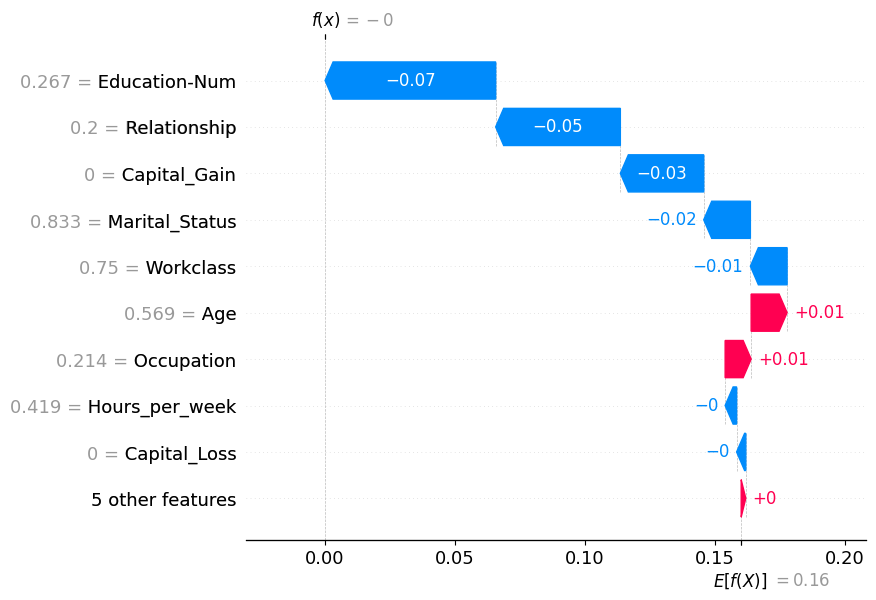

13


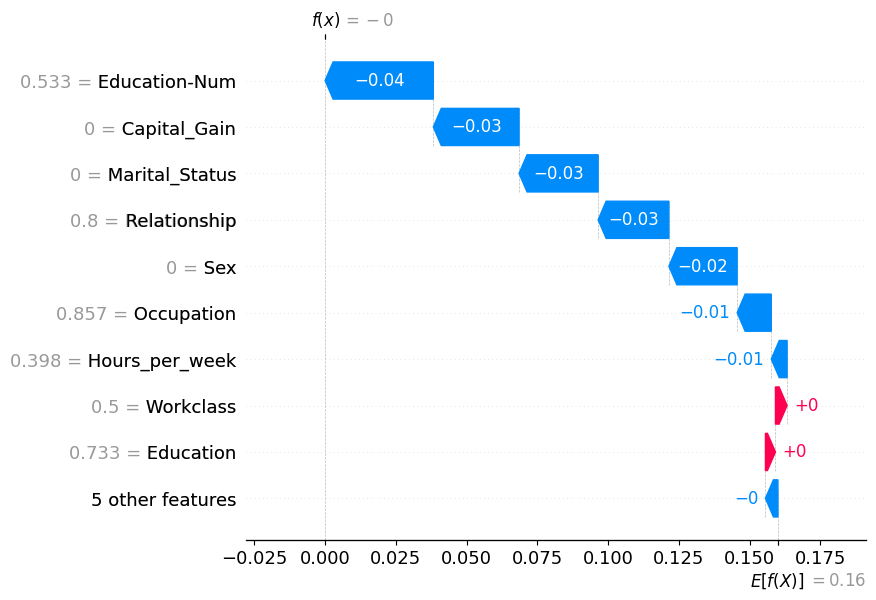

16


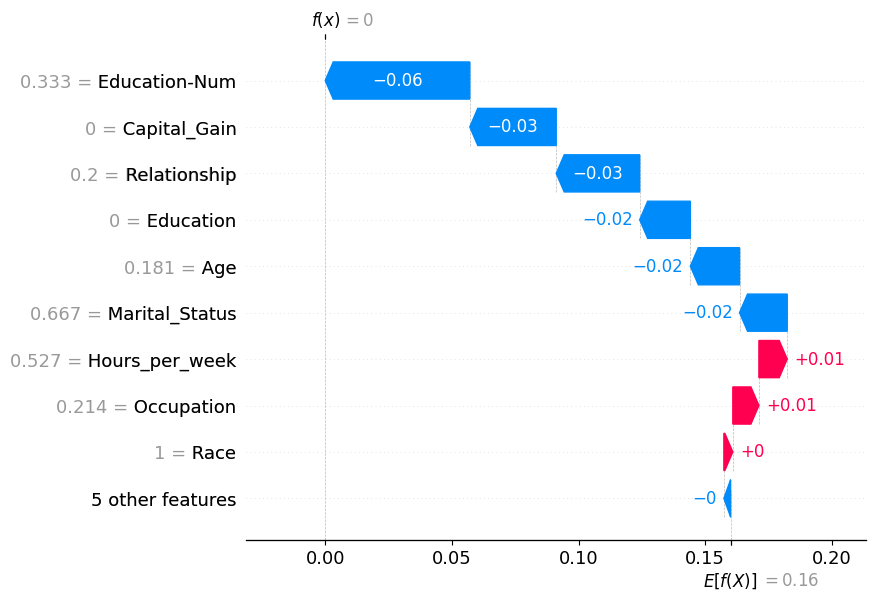

22


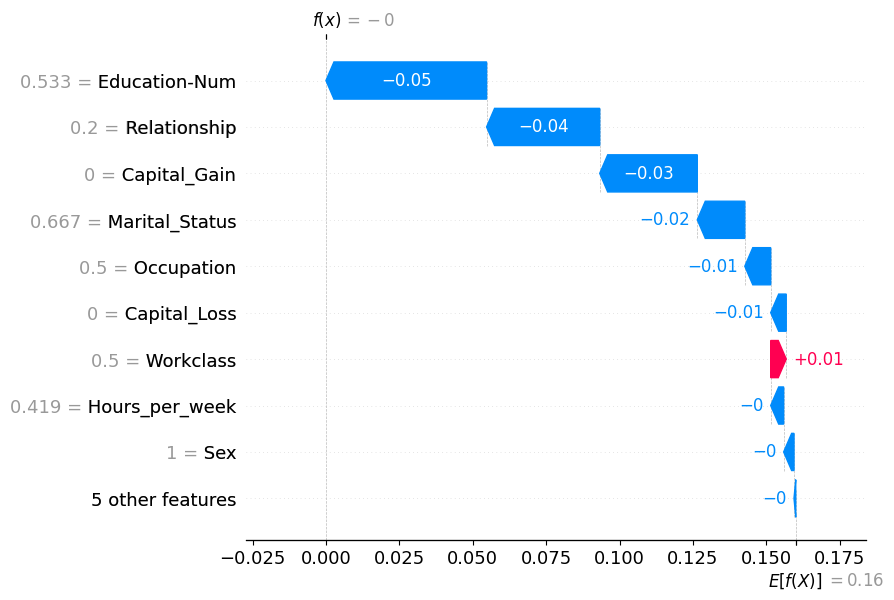

23


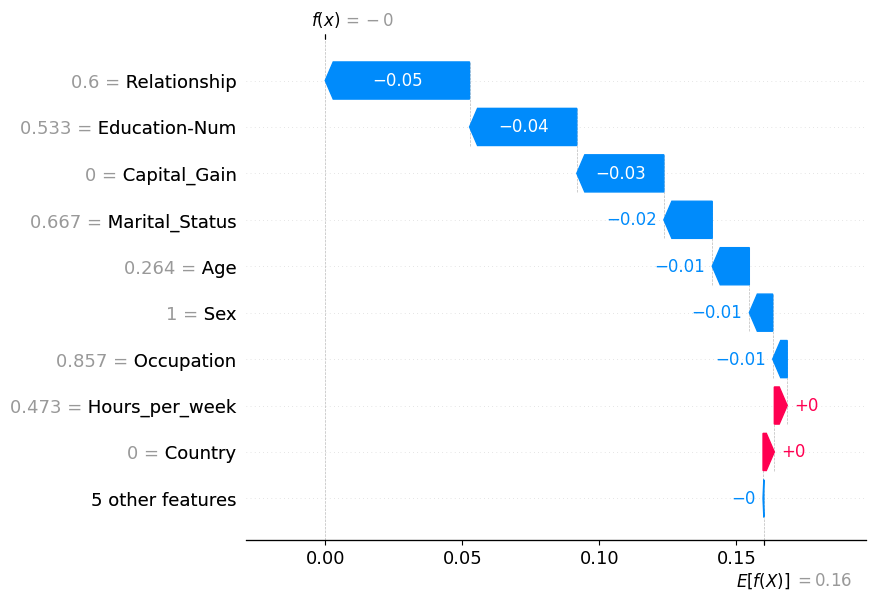

30


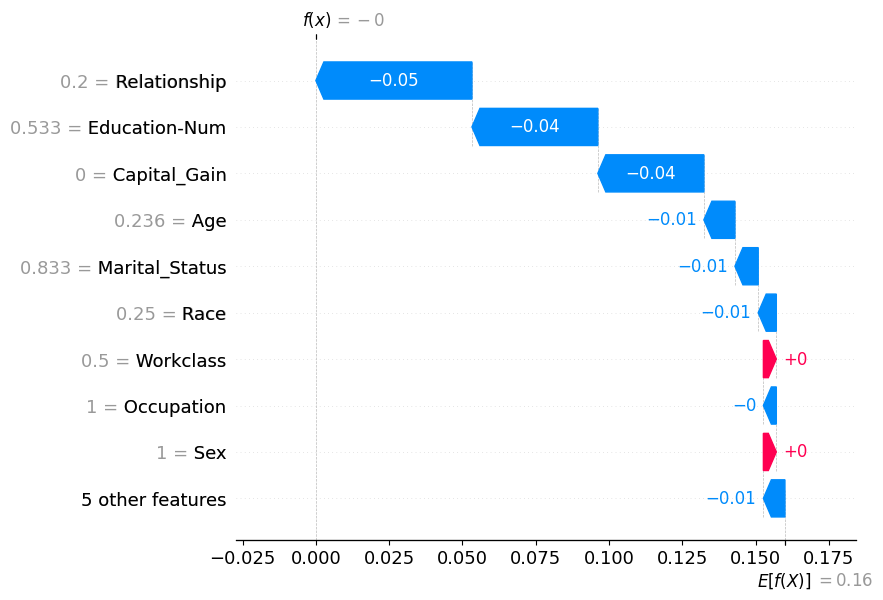

35


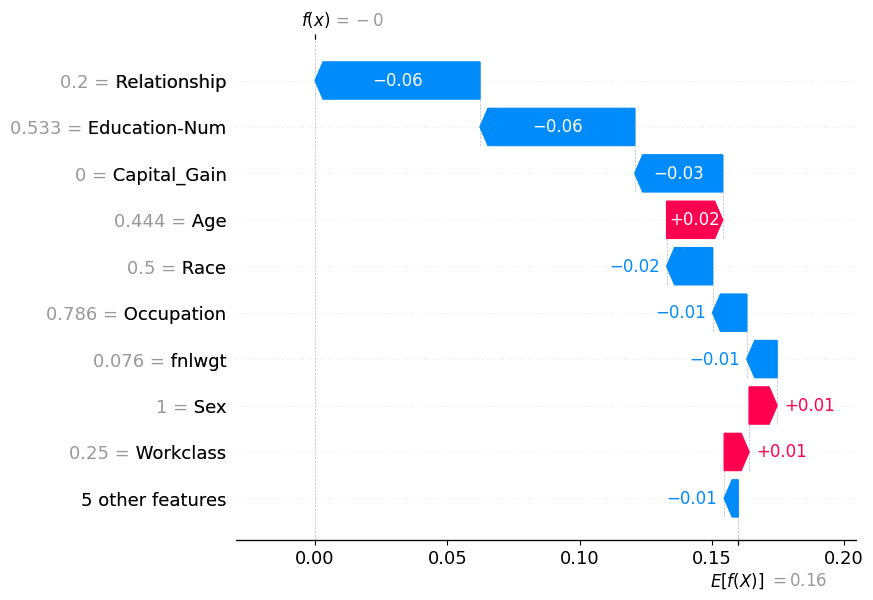

40


KeyboardInterrupt: 

In [13]:
for idx in np.where(VD[2])[0]:
    print(idx)
    shap.plots.waterfall(shap_values[idx])

In [16]:
a = np.argsort(shap_values[2].values)
b = np.argsort(shap_values[2183].values)
kendalltau(a,b)

KendalltauResult(correlation=0.4725274725274726, pvalue=0.01927860024400203)

In [55]:
scaler = MinMaxScaler()

In [62]:
scaled_shap_values = np.asarray([scaler.fit_transform(sv.reshape(-1, 1)) for sv in shap_values.values])

In [65]:
scaled_shap_values = scaled_shap_values.reshape(scaled_shap_values.shape[0],scaled_shap_values.shape[1])

In [66]:
scaled_shap_values.shape

(120, 4)